In [41]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import openai
import os
import pickle

client_credentials_managerMan = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_managerMan)

In [8]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Example: Using Spotify's "Global Top 50" playlist
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'  # Replace with other playlist IDs to get more songs
tracks = get_playlist_tracks('spotify', playlist_id)

# Extract track IDs
track_ids = [track['track']['id'] for track in tracks]

# To get 500 unique tracks, you may need to merge tracks from several playlists
# For simplicity, let's assume you already have a list of 500 unique track IDs
# track_ids = [...]

# Remove duplicates if any
track_ids = list(set(track_ids))

print(track_ids)

['629DixmZGHc7ILtEntuiWE', '3rUGC1vUpkDG9CZFHMur1t', '2HYFX63wP3otVIvopRS99Z', '4q5YezDOIPcoLr8R81x9qy', '3qhlB30KknSejmIvZZLjOD', '5XeFesFbtLpXzIVDNQP22n', '7CyPwkp0oE8Ro9Dd5CUDjW', '1C84d9abZVKWHT2YYpoean', '7BRD7x5pt8Lqa1eGYC4dzj', '6dOtVTDdiauQNBQEDOtlAB', '5Uptvz6j1sjDKxidAcnH2L', '3AJwUDP919kvQ9QcozQPxg', '2GxrNKugF82CnoRFbQfzPf', '1pymWRCuZfCd0zdiBJo0Hj', '51eSHglvG1RJXtL3qI5trr', '2HRgqmZQC0MC7GeNuDIXHN', '3hRV0jL3vUpRrcy398teAU', '7iabz12vAuVQYyekFIWJxD', '2OzhQlSqBEmt7hmkYxfT6m', '7bywjHOc0wSjGGbj04XbVi', '5N3hjp1WNayUPZrA8kJmJP', '1bjeWoagtHmUKputLVyDxQ', '63pLfjK6FvcYJYMGwtHjd6', '0mflMxspEfB0VbI1kyLiAv', '6XjDF6nds4DE2BBbagZol6', '5fZJQrFKWQLb7FpJXZ1g7K', '4Dvkj6JhhA12EX05fT7y2e', '5uQ7de4EWjb3rkcFxyEOpu', '0WbMK4wrZ1wFSty9F7FCgu', '33Nj9AdncSmHbCN3QeSZTL', '51ZQ1vr10ffzbwIjDCwqm4', '17phhZDn6oGtzMe56NuWvj', '331l3xABO0HMr1Kkyh2LZq', '2qSkIjg1o9h3YT9RAgYN75', '1BxfuPKGuaTgP7aM0Bbdwr', '6a9Z1jUms915w4O7N1PxjY', '2QjOHCTQ1Jl3zawyYOpxh6', '3QaPy1KgI7nu9FJEQUgn6h', '3Vr3zh0r7A

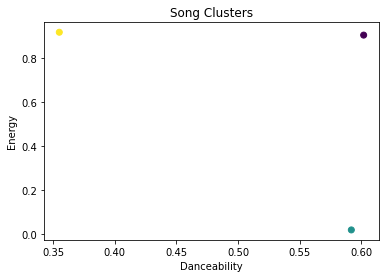

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fetch audio features for multiple songs
song_ids = ['3n3Ppam7vgaVa1iaRUc9Lp', '4VqPOruhp5EdPBeR92t6lQ', '6rqhFgbbKwnb9MLmUQDhG6']  # Add more song IDs
features = []

for song_id in song_ids:
    audio_features = sp.audio_features(song_id)[0]
    features.append(audio_features)

# Convert to DataFrame
df = pd.DataFrame(features)

# Select features for clustering
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['danceability'], df['energy'], c=df['cluster'])
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Song Clusters')
plt.show()

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Fetch data (for example purposes, only a few songs are used)
song_ids = ['3n3Ppam7vgaVa1iaRUc9Lp', '4VqPOruhp5EdPBeR92t6lQ', '6rqhFgbbKwnb9MLmUQDhG6']  # Add more song IDs
features = []
popularity = []

for song_id in song_ids:
    audio_features = sp.audio_features(song_id)[0]
    track_info = sp.track(song_id)
    features.append(audio_features)
    popularity.append(track_info['popularity'])

# Convert to DataFrame
df = pd.DataFrame(features)
df['popularity'] = popularity

# Select features for prediction
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Predicted Popularity:", y_pred)
print("Actual Popularity:", y_test.values)

Predicted Popularity: [67.78983498]
Actual Popularity: [58]


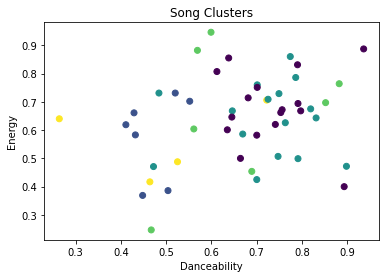

In [16]:
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['danceability'], df['energy'], c=df['cluster'], cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Song Clusters')
plt.show()

In [30]:
openai.api_key = ''

In [ ]:
def generate_song_description(features):
    prompt = f"""
    Here are the audio features of a song:
    - Danceability: {features['danceability']}
    - Energy: {features['energy']}
    - Loudness: {features['loudness']}
    - Speechiness: {features['speechiness']}
    - Acousticness: {features['acousticness']}
    - Instrumentalness: {features['instrumentalness']}
    - Liveness: {features['liveness']}
    - Valence: {features['valence']}
    - Tempo: {features['tempo']}

    Generate a detailed description of the song based on these features.
    """

    client = openai.OpenAI(api_key='')
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": prompt}],
        max_tokens=150
    )
    with open('objs.pkl', 'w') as f:  # Python 3: open(..., 'wb')
        pickle.dump([response], f)
    
    print(response.choices)
    return response.choices[0].text.strip()

# Example usage
song_features = {
    'danceability': 0.808,
    'energy': 0.626,
    'loudness': -11.840,
    'speechiness': 0.168,
    'acousticness': 0.00187,
    'instrumentalness': 0.159,
    'liveness': 0.376,
    'valence': 0.473,
    'tempo': 123.994
}

description = generate_song_description(song_features)
print(description)